In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
# plt.figure(figsize=(10, 5.625))
run = 4
# Вариант 8. Гаврилов Никита
k = 1.38*10**-23
T_0 = 17 + 273.15
W = 3*10**6

N_T = k*T_0*W
N_T_dBm = 10*math.log10(N_T/0.001)

K = 8
K_dB = 10*np.log10(K)

Pt=90*10**-3
lam = 0.09993081933333

if run == 1:
    lam = 0.149896229
    Pt=10*10**-3
    speed = 10
    alpha = 2
    sigma = 1
elif run == 2:
    speed = 2
    alpha = 4
    sigma = 8
elif run == 3:
    speed = 2
    alpha = 2
    sigma = 8
elif run == 4:
    speed = 2
    alpha = 4
    sigma = 4



d0 = lam*2 + 5
Pr_d0 = Pt*1*1*(lam/(4*np.pi*d0))**2
Pr_d0 = 10*np.log10(Pr_d0/0.001)

# d0 = 0.027894080045*2+5
# Pr_d0 = 0.000000019066988431
# Pr_d0 = 10*np.log10(Pr_d0/0.001)

deltaP_n_dB = 35

P_n_dBm = N_T_dBm + deltaP_n_dB
print(N_T)
print(f'{N_T_dBm} {P_n_dBm}')
print(Pr_d0)
print(K_dB)

1.2012209999999997e-14
-109.20377083978552 -74.20377083978552
-36.76761897779879
9.030899869919436


C:\Users\ngavr\anaconda3\envs\DITSLab1\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


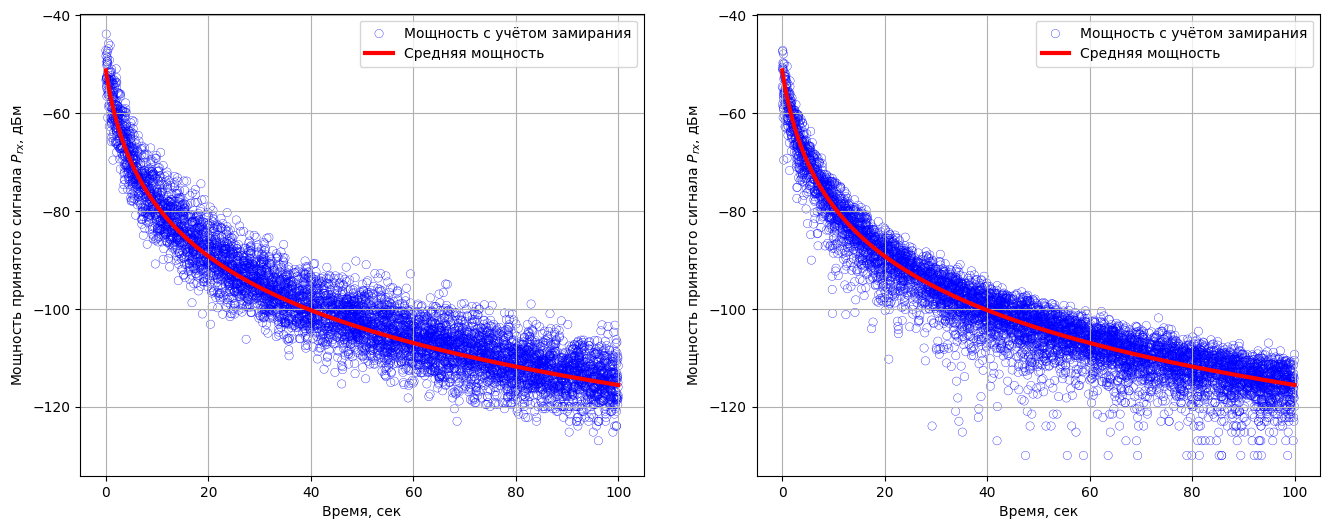

In [10]:
receptionPowerL = pd.read_csv(f'L2/{run}/receptionPowerL.csv', sep=',', header=None)
receptionPowerL_dBm = receptionPowerL
receptionPowerL_dBm[1] = 10*np.log10(receptionPowerL_dBm[1]/0.001)

receptionPowerR = pd.read_csv(f'L2/{run}/receptionPowerR.csv', sep=',', header=None)
receptionPowerR_dBm = receptionPowerR
receptionPowerR_dBm[1] = 10*np.log10(receptionPowerR_dBm[1]/0.001)

average_power = receptionPowerL.copy()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.set_xlabel('Время, сек')
ax1.set_ylabel('Мощность принятого сигнала $P_{rx}$, дБм')
ax1.scatter(receptionPowerL[0], receptionPowerL[1], facecolors='none', edgecolors='blue', label='Мощность с учётом замирания', linewidth=0.25)
# ax1.tick_params(axis='y')
ax1.grid()
ax2.set_xlabel('Время, сек')
ax2.set_ylabel('Мощность принятого сигнала $P_{rx}$, дБм')
ax2.scatter(receptionPowerR[0], receptionPowerR[1], facecolors='none', edgecolors='blue', label='Мощность с учётом замирания', linewidth=0.25)
ax2.grid()



X = np.random.normal(0, sigma, size=len(receptionPowerL[0]))

average_power[1] = Pr_d0 + alpha*10*np.log10(d0/(receptionPowerL[0]*speed+5))-15
# average_power[1] = Pr_d0 + alpha*10*np.log10(d0/(receptionPowerL[0]*speed))

ax1.plot(average_power[0], average_power[1], color='red', linewidth=3, label='Средняя мощность')
ax2.plot(average_power[0], average_power[1], color='red', linewidth=3, label='Средняя мощность')

ax1.legend()
ax2.legend()
(qa1, qb1) = ax1.get_ylim()
(qa2, qb2) = ax2.get_ylim()
ax1.set_ylim([min(qa1, qa2), max(qb1, qb2)])
ax2.set_ylim(ax1.get_ylim())

plt.savefig(f'L2/{run}/plot1.png')

In [16]:
# bitErrorRate = pd.read_csv(f'{run}/bitErrorRate.csv', sep=',', header=None)
# 
# fig, ax3 = plt.subplots()
# 
# 
# ax3.set_xlabel('Время, сек')
# ax3.set_ylabel('Вероятность битовой ошибки $\\beta$')
# ax3.set_yscale('log')
# # ax3.set_ylim([10**-15, 1])
# ax3.plot(bitErrorRate[0], bitErrorRate[1])
# ax3.grid()
# plt.savefig(f'{run}/plot2.png')


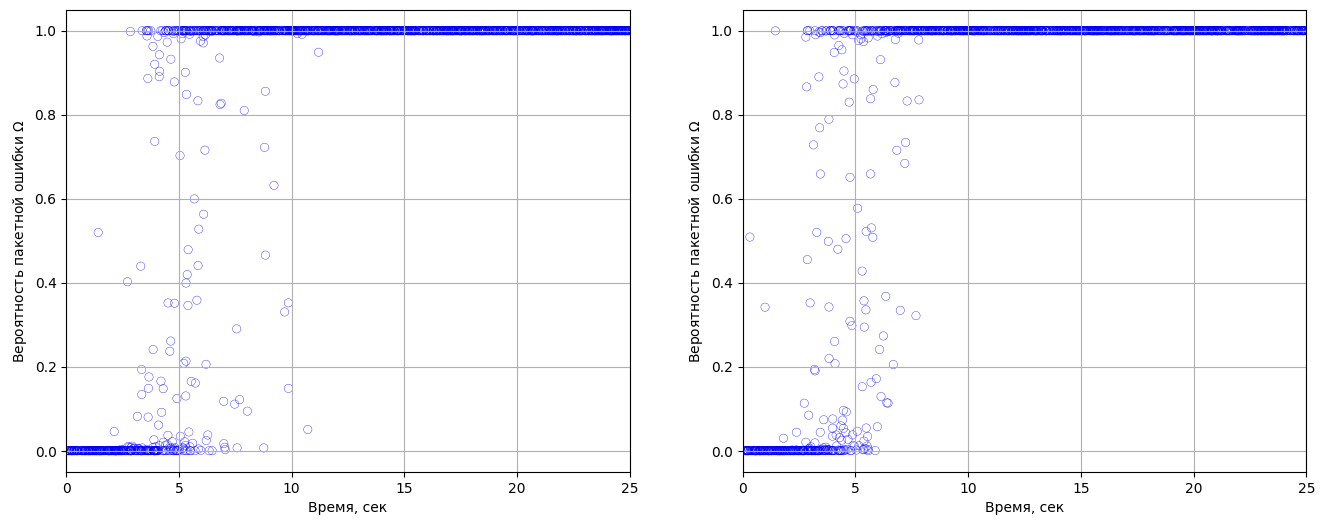

In [17]:
packetErrorRateL = pd.read_csv(f'L2/{run}/packetErrorRateL.csv', sep=',', header=None)
packetErrorRateR = pd.read_csv(f'L2/{run}/packetErrorRateR.csv', sep=',', header=None)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))


ax3.set_xlabel('Время, сек')
ax3.set_ylabel('Вероятность пакетной ошибки $\Omega$')
ax3.scatter(packetErrorRateL[0], packetErrorRateL[1], facecolors='none', edgecolors='blue', linewidth=0.25)
ax3.grid()

ax4.set_xlabel('Время, сек')
ax4.set_ylabel('Вероятность пакетной ошибки $\Omega$')
ax4.scatter(packetErrorRateR[0], packetErrorRateR[1], facecolors='none', edgecolors='blue', linewidth=0.25)
ax4.grid()

ax3.set_xlim([0, 25])
ax4.set_xlim([0, 25])

plt.savefig(f'L2/{run}/plot2.png')


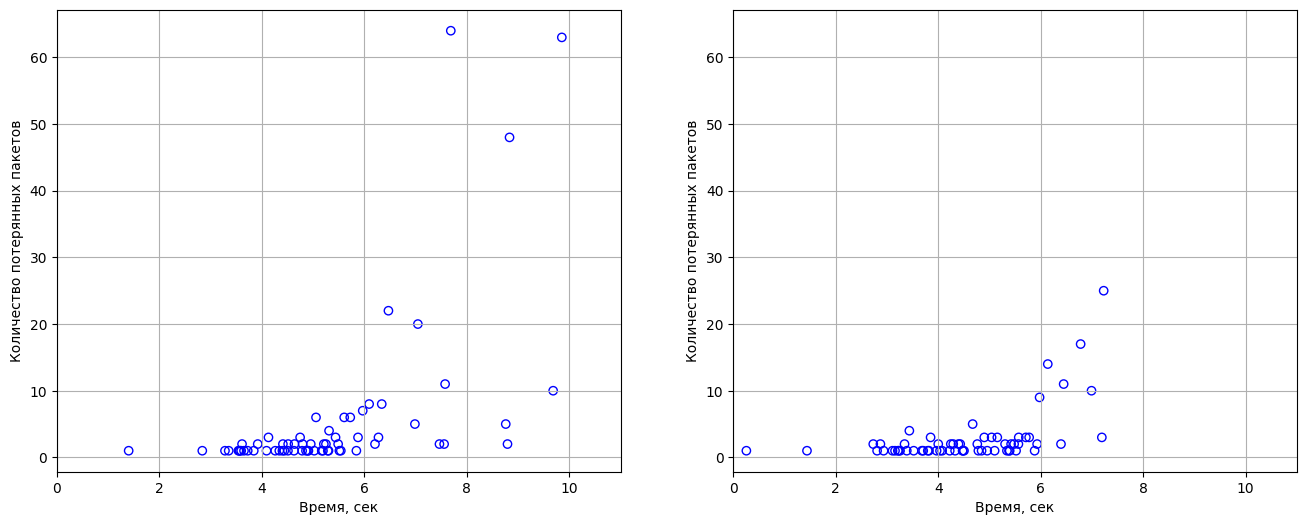

In [18]:
rcvdPkSeqNoL = pd.read_csv(f'L2/{run}/rcvdPkSeqNoL.csv', sep=',', header=None)
rcvdPkSeqNoR = pd.read_csv(f'L2/{run}/rcvdPkSeqNoR.csv', sep=',', header=None)

lostPacketsL = rcvdPkSeqNoL
lostPacketsL[1] = rcvdPkSeqNoL[1].shift(-1) - rcvdPkSeqNoL[1] - 1
lostPacketsL = lostPacketsL.drop(lostPacketsL[lostPacketsL[1]==0].index)

lostPacketsR = rcvdPkSeqNoR
lostPacketsR[1] = rcvdPkSeqNoR[1].shift(-1) - rcvdPkSeqNoR[1] - 1
lostPacketsR = lostPacketsR.drop(lostPacketsR[lostPacketsR[1]==0].index)

fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))

ax5.set_xlabel('Время, сек')
ax5.set_ylabel('Количество потерянных пакетов')
ax5.scatter(lostPacketsL[0], lostPacketsL[1], facecolors='none', edgecolors='blue', linewidth=1)

ax6.set_xlabel('Время, сек')
ax6.set_ylabel('Количество потерянных пакетов')
ax6.scatter(lostPacketsR[0], lostPacketsR[1], facecolors='none', edgecolors='blue', linewidth=1)

ax5.set_xlim([0, 11])
ax6.set_xlim([0, 11])
ax6.set_ylim(ax5.get_ylim())
# ax5.set_ylim(ax6.get_ylim())
ax5.grid()
ax6.grid()
plt.savefig(f'L2/{run}/plot3.png')